# Chatbot Sandox

## Introduction

The aim of this notebook is to explore chatbot open source technologies in order to **design and deploy a Proof of Concept** of an Artificial Inteligence agent for a **educational and teaching use case**.

## Sources review

The first step for this POC will be the revision of open source technologies available, use cases and examples throughout the web that works as guide and implementation ideas.The following is a summary of the main sources found and the key takeaways from these sources:



### 1-  [Building a FAQ Chatbot in Python – The Future of Information Searching](https://www.analyticsvidhya.com/blog/2018/01/faq-chatbots-the-future-of-information-searching/)

*   **Framework used**: RASA NLU.RASA-NLU builds a local NLU (Natural Language Understanding) model for extracting intent and entities from a conversation. It’s open source, fully local and above all, free!
Below it´s an example of RASA architecture:
![RASA Framework](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Bot-Arch.png)

A RASA-NLU platform needs to be trained before we start using it. We need to supply it with a few sentences and mention which are the **intents and entities** in it. Intents are the actions/categories of the sentences and entities are the necessary variables needed to fulfil the actions.

For example, “I wish to book a flight from Mumbai to Pune on 27 March” has “flight-booking” as the intent and “Mumbai”,” Pune” and “27 March” as the entities.This training data is stored in a json, for example:



```
{
        "text": "show me a mexican place in the centre",
        "intent": "restaurant_search",
        "entities": [
          {
            "start": 31,
            "end": 37,
            "value": "centre",
            "entity": "location"
          },
          {
            "start": 10,
            "end": 17,
            "value": "mexican",
            "entity": "cuisine"
          }
        ]
}
```
We can use an online UI to build intercatively the data [here](https://rasahq.github.io/rasa-nlu-trainer/)


*  **Other information in the source**: The source contains tutorial to deploy the RASA server and the RASA engine(the heart of the chatbot, where the model is trained).


### 2 [Building A Whatsapp Chatbot With Python ChatterBot + Flask+ Ngrok+Twilio](https://medium.com/analytics-vidhya/building-a-whatsapp-chatbot-with-python-chatterbot-flask-ngrok-twilio-877e29e7511f)

*   **Framework Used**: 
Chatterbot.It’s a Python Library that once you feed it with query-response training data, “selects the closest matching response by searching for the closest matching known statement that matches the input, it then returns the most likely response to that statement based on how frequently each response is issued by the people the bot communicates with.” 
*  This means that this is a library to develop a FAQ chatbot.
*   Webserver: Using ```flask```as a easy solution to deploy the chatbot and then ``` ngrok``` to expose the web service to the internet( this is not a safe procedure). from localhost.
* Twilio: This app uses Twilio to deploy the chatbot to WhatsApp and provides some guidance in that regards.



### 3 [Building Scheduled Report through WhatsApp using Python](https://medium.com/analytics-vidhya/building-scheduled-report-through-whatsapp-using-python-57ca704d0eb6)

* **Framework used:** This app utilizes twilio to create an automated report to send messages to whatsapp.This tutorial provides a comprehensive step by step guide to connect python with Twilio.

* The app is deployed in **Heroku**, which is an online server that provides free tier to develop POCs.

* Although this is not a chatbot app, it contains important pieces for the framework such as Twilio connection and heroku deployment.


### 4 [I Built a Python WhatsApp Bot to Keep Me Sane During Quarantine](https://python.plainenglish.io/i-built-a-python-whatsapp-bot-to-keep-me-sane-during-quarantine-f2f97a092a3b)

* **Framework used** This app uses Twilio API as long as third party APIs to develop a whatsapp service that provides several information to the user.
* The app is deployed in pythonanywhere that uses ```django``` as web framework.
* This app is interesting as provides how to deploy to whatsapps and send images instead of just text to the user and also provides another alternative for hosting, which is pythonanywhere.

### 5 [Building a Conversational Chatbot for Slack using Rasa and Python -Part 1](https://towardsdatascience.com/building-a-conversational-chatbot-for-slack-using-rasa-and-python-part-1-bca5cc75d32f)

* **Framework used** :This article also uses **RASA NLU** to develop a conversational bot.A Conversation chatbot understands the context of the conversation and can handle any user goal gracefully and help accomplish it as best as possible. This doesn’t always mean that the bot will be able to answer all questions but it can handle the conversation well.
* The bot was deployed in **Slack**.

* Provides further information of how RASA works, including the two key components of RASA Stack, that we will need to create in order to develop a fully functional chatbot:

1.   **Rasa NLU**: a library for natural language understanding with **intent classification and entity extraction**. This helps the chatbot to understand what the user is saying.

2.   **Rasa Core**: a chatbot framework with machine learning-based dialogue management **that predicts the next best action based on the input from NLU**, the conversation history, and the training data.

* The article also describes how to create the data needed for the NLU engine as well as the Core engine for the dialogue management.




## Scope 

The scope of this POC is to build a first iteration of a chatbot of an introductory course of the R Programming Language, which allows students to review each lesson and revisit the contents to validate the learning and ask for clarification if is needed.

Goals of this POC:

0- Getting used to the platform running a sample bot to understand the pipeline of training a chatbot and the major considerations.

1- Create a MVP with a mix of make up data ( intent questions and stories) and data from previous courses of questions already asked by students.This MVP will be a first iteration which objective is getting use to the framework and algorithms.

2- Improve data collection with more real data examples, to retrain the models and increase the model accuracy.

3- Deploy the model to slack for first testing and then consider the option of deployment to other channels such as WhatApp.

5- Improve the chatbot capabilities , such as the ability to create scoring tests for the students in order to evaluate and measure the learning process, send feedback in other formats such as images or videos and provide other functionality such as handle administrative questions.

# Goal 0

## Setting the Environment

In [1]:
#Installing RASA

#!pip install rasa==1.10.3 # Installing this version due to tensorflow conflicts

In [ ]:
# Installing spacy(for chatbot engine and nest_asyncio for jupyter capabilities)

"""
!python -m spacy download en
!python -m spacy download es
!pip install nest_asyncio==1.3.3

"""

In [1]:
# Importing libraries

import os
import rasa
import nest_asyncio

nest_asyncio.apply()

In [2]:
# Change working directory

os.chdir("/home/felipe/chatbot/project")
os.getcwd()

'/home/felipe/chatbot/project'

In [3]:
# Create project structure
from rasa.cli.scaffold import create_initial_project

project = "testProject"
create_initial_project(project)

In [ ]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

In [8]:
# Create variables to train inittial model
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [7]:
# Training the model(Try 3 times because it fails due to bug in rasa)
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

The configuration for policies and pipeline was chosen automatically. It was written into the config file at 'config.yml'.
Nothing changed. You can use the old model stored at 'C:\Users\Felipe Jiménez\OneDrive\PythonProjects\chatbot\testProject\models\20210512-232334.tar.gz'.
TrainingResult(model='models\\20210512-232334.tar.gz', code=0)


In [8]:
# Test the trained model

from rasa.jupyter import chat
from rasa.core.agent import Agent, create_agent

endpoints = 'endpoints.yml'


In [22]:
#chat(model_path,endpoints)


## 1 Create data for training 

In [10]:
%%writefile data/nlu.yml
## Modify the nlu.md

version: "2.0"

nlu:

- intent: concepts_r
  examples: |
    - cuáles son los conceptos básicos en [R](lan)?
    - cuáles son los elementos básicos en  [R](lang)?
    - que conceptos debo conocer en [R](lang) como mínimo?
    - Conceptos básicos de [R](lang) ? 
    - conceptos básicos
    - ver conceptos mínimos
    - conocer los conceptos básicos que debo saber
    - cuales son los componentes basicos de [R](lang)

- intent: basic_packages
  examples: |
    - para que sirven los [paquetes](concept) de [R](lang)?
    - que es un [paquete](concept) ?
    - y los [paquete](concept) que propósito tienen?
    - en [R](lang), que son los [paquete](concept)
    - aprender sobre [paquete](concept)
    - [paquete](concept)
    - ahora cuenteme sobre [paquete](concept)
    - ok y que son los [paquete](concept) de [R](lan)  
    - excelente! y finalmente los [paquete](concept)?
    
- intent: basic_functions
  examples: |
    - que es una [función](concept) de [R](lan)?
    - que es una [función](concept) ?
    - que hacen las [funciones](concept)?
    - cuál es el propósito de las [funciones](concept)
    - quiero saber de [funciones](concept)
    - conocer sobre las [funciones](concept)
    - que hace una [función](concept)
    - mmm y las [funciones](concept) que son?
    - ok ok y una [función](concept) que es?

- intent: basic_console
  examples: |
    - que es la [consola](concept) de [R](lang)?
    - que es una [consola](concept) ?
    - Para que sirve la [consola](concept)?
    - La [consola](concept) en [R](lang) que es?
    - y la [consola](concept) que es?
    - y la [consola](concept) de [R](lang) que es?
    - y la [consola](concept)?
    - Cual es la función de la [consola](concept)?
    - gracias...y la [consola](concept)?
    - muchas gracias!!! y que es la [consola](concept)?
    
- intent: basic_commands
  examples: |
    - que son [comandos](concept) en R?
    - que es un [comando](concept) de R?
    - que son [comandos](concept)?
    - quiero saber sobre [comandos](concept)?
    - Que se entiende por [comando](concept) en [R](lang)?

- intent: basic_r
  examples: |
    - Que es [R](lang)?
    - Que es el ambiente de [R](lang)?
    - Cuáles son las funcionalidades de [R](lang)?
    - quiero saber de [R](lang) básico
    - repasar introducción a [R](lang)
    - Puedes contarme sobre el ambiente de [R](lang)?

- intent: greet
  examples: |
    - Hola
    - Buenos dias
    - Buenas
    - Hola hola
    - Buenas tardes
    - Buenas noches
    - que tal?
    - como esta
    - como te va
    - que me dice?
    - eso en todas?
    - pura vida

- intent: exit
  examples: |
    - adios
    - chao
    - nos vemos
    - hasta luego
    - estamos hablando
    - muchas gracias, chao
    - muchas gracias, adios
    - muchas gracias, bye
    - muchas gracias, hasta luego
    - hasta la vista
    - irme
    - me voy
    - salir
    - pura vida gracias
    - tuanis gracias

- intent: affirm
  examples: |
    - si
    - claro
    - por supuesto
    - exacto
    - suena bien
    - de hecho

- intent: deny
  examples: |
    - no
    - jamas
    - nunca
    - no lo creo
    - no me gusta
    - no realmente

- intent: bot
  examples: |
    - eres un bot?
    - eres un robot?
    - eres humano?
    - estoy hablando a un robot?
    - estoy hablando a un humano?
    - le estoy hablando a un robot, cierto?
    - no le estoy hablando a un humano, cierto?

- intent: review_class_one
  examples: |
    - quiero repasar la clase 1
    - podemos repasar la clase 1
    - tengo unas dudas de la clase 1
    - necesito revisar los temas de la clase 1
    - no me siento seguro de los temas de la clase 1
    - requiero revisar la primera clase
    - repasar la primera clase
    - ver los temas de la primera clase

- synonym: comando
  examples: |
    - comandos

- synonym: función
  examples: |
    - funciones
    - funcion

- synonym: paquete
  examples: |
    - paquetes
    - librería
    - libreria
    - librerias

Overwriting data/nlu.yml


In [11]:

%%writefile domain.yml

# Create the domain.yml structure
# http://www.yamllint.com/ for yaml validation.
version: "2.0"

config:
  store_entities_as_slots: true
    
intents:
  - greet
  - exit
  - affirm
  - deny
  - bot
  - review_class_one
  - basic_r:
      use_entities:
      - lang
  - concepts_r:
      use_entities:
      - lang
  - basic_commands:
      use_entities:
      - concept
  - basic_console:
      use_entities:
      - concept
  - basic_functions:
      use_entities:
      - concept
  - basic_packages:
      use_entities:
      - concept
    
entities:
  - language
  - concept 
    
slots:
  lang:
    type: categorical
    values:
    - R
    - python
  concept:
    type: categorical
    values:
    - comando
    - consola
    - funciones
    - scripts
    - objetos

responses:
  utter_greet:
    - text: Hola todo bien! :smile:\n
            Que deseas hacer?
  utter_exit:
    - text: Chao!!
        
  utter_basic_packages:
    - text: "Las paquetes(también llamados librerías) son conjuntos de funciones creados usualmente por terceros.\n
             dentro de la comunidad para colaborar en un problema específico.\n
             -Existen paquetes en prácticamente todas las áreas científicas.\n
             -Eso si, la calidad es muy diversa, desde paquetes desarrollados por hobbystas\n
              hasta paquetes desarrollados por compañias.\n
             -Los paquetes se instalan mediante la función install_packages(<nombrePaquete>)\n
             -El principal repositorio donde se publican es el [CRAN](https://cran.r-project.org/)\n"
             

  utter_basic_functions:
    - text: "Las funciones son pequeños programas del lenguaje que reciben un input del usuario,\n
             ejecutan las instrucciones diseñadas por el programador y devuelven\n
             el output deseado basado en los datos ingresados.\n"

  utter_basic_console:
    - text: "No, no es el Play Station.Aunque muchos se divierten ahí.La consola \n
             Es la interfaz entre el programador y el lenguaje que permite introducir los comandos para visualizar los resultados.\n"
        
  utter_basic_commands:
    - text: "Los comandos son las instrucciones que se le dan al lenguaje para que ejecute lo solicitado por el usuario"    
  utter_concepts_r:
    - text: "Los conceptos o elementos básicos que debes conocer en R son:\n
             -comandos\n
             -consola\n
             -Funciones\n
             -Paquetes\n
             -Scripts\n
             -Objetos\n"
  utter_basicR:
    - text: "Claro, R es lo mejor...R es un suite que integra facilidades para:\n
          -la manipulación de datos= Manejo y almacenaje de datos.\n
          -Operaciones con datos= Cálculo de operaciones en vectores y matrices\n
          -Análisis de datos= Inmensa colección de herramientas de análisis\n
          -Facilidades gráficas= Poderoso motor de visualizaciones\n
          -Lenguaje de Programación= Para el análisis de datos y mucho más...\n"
    
      image: "https://memegenerator.net/img/instances/66981493/welcome-to-r-statistics-i-will-be-your-guide.jpg"
  utter_classOne:
    - text: "Que tema de la clase 1 querés revisar? Como recordatorio vimos:\n
          -Que es el ambiente R?\n
          -Conceptos básicos de R\n
          -Paquetes en R\n
          -El IDE de Rstudio\n
          -R Studio Cloud\n"
  utter_bot:
    - text: "Soy un robot :)"

  utter_cheer_up:
  - text: "Here is something to cheer you up"
    image: "https://i.imgur.com/nGF1K8f.jpg"
        
  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."
    
session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true

Overwriting domain.yml


In [12]:
%%writefile data/stories.yml
# Create the stories.md structure

version: "2.0"

stories:
    
- story: exit
  steps:
  - intent: exit
  - action: utter_exit

- story: class1 basic R
  steps:
  - intent: greet
  - action: utter_greet
  - intent: review_class_one
  - action: utter_classOne
  - intent: basic_r
  - action: utter_basicR
    
- story: class1 commands
  steps:
  - intent: concepts_r
  - action: utter_concepts_r
  - intent: basic_commands
    entities:
    - concept: comando
  - slot_was_set:
    - concept: comando
  - action: utter_basic_commands
    
    
- story: class1 console
  steps:
  - intent: concepts_r
  - action: utter_concepts_r
  - intent: basic_console
    entities:
    - concept: consola
  - slot_was_set:
    - concept: consola
  - action: utter_basic_console

- story: class1 functions
  steps:
  - intent: concepts_r
  - action: utter_concepts_r
  - intent: basic_functions
    entities:
    - concept: función
  - slot_was_set:
    - concept: función
  - action: utter_basic_functions

- story: class1 packages
  steps:
  - intent: concepts_r
  - action: utter_concepts_r
  - intent: basic_packages
    entities:
    - concept: paquete
  - slot_was_set:
    - concept: paquete
  - action: utter_basic_packages
    
- story: robot
  steps:
  - intent: bot
  - action: utter_bot


Overwriting data/stories.yml


In [13]:
# Retrain model with new data

model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

The configuration for policies and pipeline was chosen automatically. It was written into the config file at 'config.yml'.


/home/felipe/chatbot/lib/python3.8/site-packages/rasa/shared/utils/io.py:97: UserWarning: Issue found in 'data/rules.yml': 
Found intent 'goodbye' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/home/felipe/chatbot/lib/python3.8/site-packages/rasa/shared/utils/io.py:97: UserWarning: Issue found in 'data/rules.yml': 
Found intent 'bot_challenge' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories


Training NLU model...


/home/felipe/chatbot/lib/python3.8/site-packages/rasa/utils/train_utils.py:561: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  rasa.shared.utils.io.raise_warning(
Epochs: 100%|██████████| 100/100 [01:03<00:00,  1.57it/s, t_loss=1.94, i_acc=1, e_f1=0.943]    


NLU model training completed.
Training Core model...


Processed trackers: 100%|██████████| 7/7 [00:00<00:00, 161.76it/s, # actions=21]
Processed actions: 21it [00:00, 662.17it/s, # examples=21]
Processed trackers: 100%|██████████| 2/2 [00:00<00:00, 409.82it/s, # actions=5]
Processed actions: 5it [00:00, 1663.22it/s, # examples=4]
Processed trackers: 100%|██████████| 9/9 [00:00<00:00, 835.13it/s]


Core model training completed.
Your Rasa model is trained and saved at '/home/felipe/chatbot/project/models/20210516-130804.tar.gz'.
TrainingResult(model='models/20210516-130804.tar.gz', code=0)


In [20]:
endpoints = "endpoints.yml"
#chat(model_path, endpoints)

In [40]:
# Evaluate model performance

import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

ModuleNotFoundError: No module named 'rasa.data'

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has

100%|██████████| 3/3 [00:00<00:00, 86.11it/s]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Num'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: m

100%|██████████| 52/52 [00:00<00:00, 78.96it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done testing...


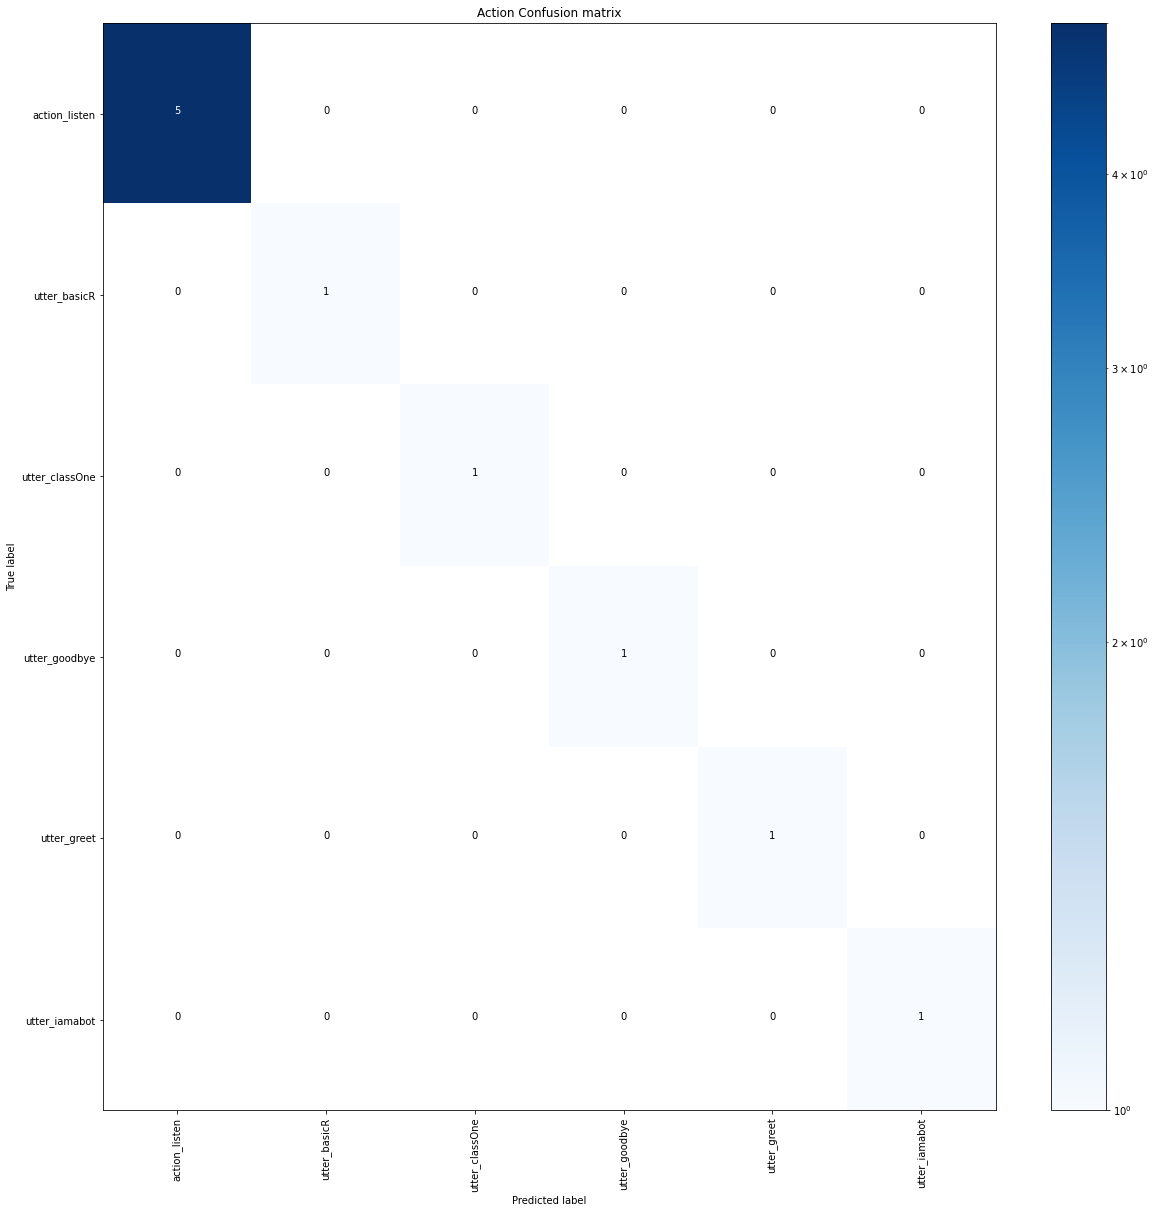

In [18]:
#Evaluate and plot
rasa.test(model_path, stories_directory, nlu_data_directory)

print("Done testing...")